<a href="https://colab.research.google.com/github/Kandeo/Thyroid-Diesease-Predictive-Model/blob/main/Christine_Kandeo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thyroid Disease Predictive Analysis**

**Overview** 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The healthcare dataset provided is to be used to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that they have hypothyroid.

Part 1: Decision trees:
- For this section, at least 2 out of the 3 advanced models: Random forests, Ada boosted trees, and gradient boosted trees should be used.
- Optimization should be done documenting how the hyperparameters are tuned.
- Identify the 2 trusted models and use the model to determine which features are most impactful in influencing the prediction.

Part 2: SVM:

- In this section, one is required to clean the data so as to make sense of the features.

- Document the transformation done on the data.

- Polynomial, linear and rbf kernel function to be applied to build the SVM model and then evaluate their performance picking the kernel that performs the best. 

Dataset: http://bit.ly/hypothyroid_data  

# **Defining the Question**

**Specific Data Analytics Question**

Building a model that determines whether or not a patient's symptoms indicate that they have Hypothyroid.

**Metrics for success**

The Model built should have an Accuracy score of more than 70%

**Understanding the Context**

Hypothyroidism happens when the thyroid gland doesn't make enough thyroid hormones to meet the body's needs. Hypothyroidism can affect people of all ages, genders and ethnicities. One is at a higher risk for hypothyroidism if they:

 - Are a woman
 - Are older than age 60
 - Have had a thyroid problem before, such as a goiter
 - Have had surgery to correct a thyroid problem
 - Have received radiation treatment to the thyroid, neck, or chest
 - Have a family history of thyroid disease
 - Were pregnant or had a baby in the past 6 months
 - Have Turner syndrome, a genetic disorder that affects females
 

This research aims to use machine learning algorithms to develop a prediction model that can identify whether or not a patient has a hypothyroid condition based on their symptoms.

**Experimental Design**

1. Data Loading
 - Loading Dependencies
2. Data Preprocessing
 - Data Uniformity
 - Handling missing/duplicate values
 - Checking Outliers
3. Data Exploration
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Decision Trees
 - Support Vector Machine
5. Performance Analysis
 -  Conclusions

# **Data Loading**

Importing Libraries

In [ ]:
#Importing dependencies:

#For Data manipulation and EDA:
import pandas as pd     
import seaborn as sb     
import seaborn as sns   
import numpy as np      
import matplotlib.pyplot as plt

#For Model training:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image 
from sklearn.svm import SVC 
from six import StringIO
import pydotplus

#For Performance Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

#For Warnings:
import warnings
warnings.filterwarnings("ignore")


# **Data Preprocessing**

Loading the Dataset

In [ ]:
#Previewing the Hypothyroid dataset:
Hypothyroid = pd.read_csv('hypothyroid.csv')
Hypothyroid.head(4)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?


In [ ]:
#Checking the shape of the dataset:
Hypothyroid.shape


(3163, 26)

Data Uniformity

In [ ]:
#Checking the datatypes:
Hypothyroid.dtypes


status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

From the Dataset, Age, TSH ,T3, TT4, T4U, FTI, TBG are numerical variables. From the summary above, the respective columns have been assigned as Objects due to the attribute '?'.



In [ ]:
#Replacing the ? on the numerical columns with none:
Hypothyroid.replace('?', np.nan, inplace = True)


In [ ]:
#Converting the numerical variables from objects to float:
Numerics = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for i in Numerics:
    Hypothyroid[i] = pd.to_numeric(Hypothyroid[i])


Missing/duplicate values

In [ ]:
#Checking for null entries:
Hypothyroid.isnull().sum()


status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
#A descriptive summary of the columns with null values:
Missings = Hypothyroid[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].copy()
Missings.describe() 


,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [ ]:
#Filling the null values with the means:
for i in Missings:
  Hypothyroid[i] = Hypothyroid[i].fillna(Hypothyroid[i].mean())
    

In [ ]:
#Dropping the 73 observations missing information on the Sex column:
Hypothyroid.dropna(inplace = True)


In [ ]:
#Checking for duplicates:
Hypothyroid.duplicated().sum()    #77 duplicates identified

#Dropping duplicates:
Hypothyroid.drop_duplicates(inplace=True)
Hypothyroid.duplicated().sum()


0

In [ ]:
#Converting Age column to integer:
Hypothyroid['age'] = Hypothyroid['age'].astype('int')


In [ ]:
#Viewing the final information:
Hypothyroid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3013 non-null   object 
 1   age                        3013 non-null   int64  
 2   sex                        3013 non-null   object 
 3   on_thyroxine               3013 non-null   object 
 4   query_on_thyroxine         3013 non-null   object 
 5   on_antithyroid_medication  3013 non-null   object 
 6   thyroid_surgery            3013 non-null   object 
 7   query_hypothyroid          3013 non-null   object 
 8   query_hyperthyroid         3013 non-null   object 
 9   pregnant                   3013 non-null   object 
 10  sick                       3013 non-null   object 
 11  tumor                      3013 non-null   object 
 12  lithium                    3013 non-null   object 
 13  goitre                     3013 non-null   objec

Checking Outliers

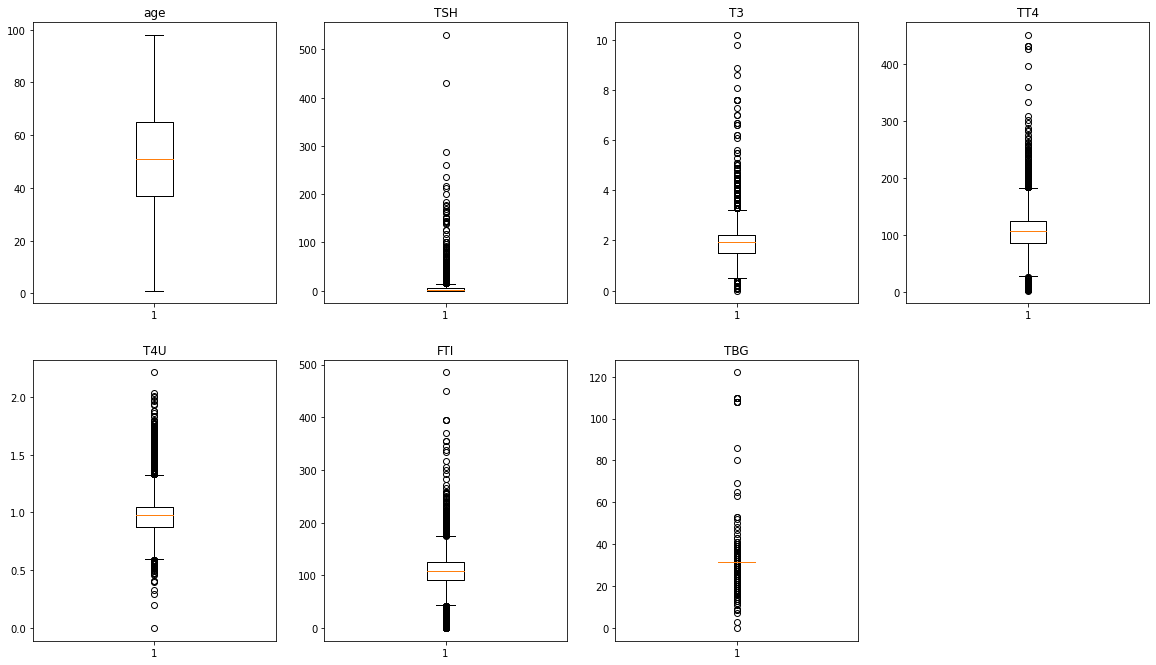

In [ ]:
# Checking for Outliers on the numerical features:
# Creating a dictionary:

dictionary = {'age': 1, 'TSH': 2, 'T3': 3,'TT4': 4,'T4U': 5, 'FTI': 6,'TBG': 7}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in dictionary.items():
  plt.subplot(5,4,i)
  plt.boxplot(Hypothyroid[variable])
  plt.title(variable)
plt.show()


Since there's no basis to assume the entries are not valid observations, no outliers are dropped

In [ ]:
#Finding  Q1 and Q3:
Q1 = Hypothyroid.quantile(0.25)
Q3 = Hypothyroid.quantile(0.75)
Q1, Q3

#Finding the Interquartile range:
IQR = Q3 - Q1
IQR


age    28.00000
TSH     5.92318
T3      0.70000
TT4    39.00000
T4U     0.18000
FTI    33.00000
TBG     0.00000
dtype: float64

# **Exploratory Data Analysis**

1. **Univariate Analysis**

This analysis is performed with an aim of describing the data in terms of:

 - Gender distibution

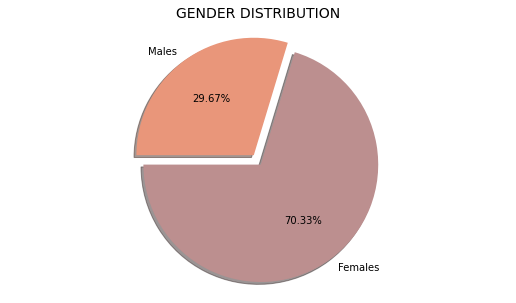

In [ ]:
#Viewing the data in terms of sex:
Gender = Hypothyroid['sex'].value_counts()
Gender
# F: 2,119    M:  894

#Visualising the information on a pie chart:
labels= ['Females','Males']
colors=['rosybrown', 'darksalmon']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("GENDER DISTRIBUTION", fontsize = fontsize)
plt.pie(Gender,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


70% of the patients were females. Being that they are highly at risk, that makes the data appropriate

 - Age Distribution

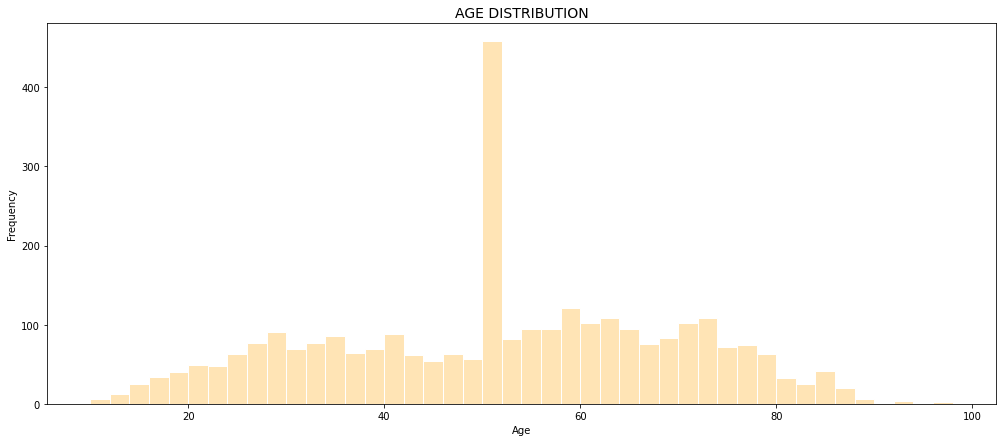

In [ ]:
#Viewing the age distribution of patients:
plt.figure(figsize= (17, 7))
fontsize = 14
plt.title('AGE DISTRIBUTION', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(Hypothyroid.age, bins= np.arange(10, 100, 2), color='moccasin', edgecolor='white');


Most individuals were between the ages of 50-52 years

 -  Distribution of Sick patients

In [ ]:
#To find out if majority of the patients were sick:
Sickness = Hypothyroid['sick'].value_counts(normalize=True)*100
Sickness


f    96.813807
t     3.186193
Name: sick, dtype: float64

96% of the patients were not Sick

 - Understanding the number of patients who've undergone Thyroid surgery

In [ ]:
#To find out if majority of the patients had undergone thyroid surgery:
Surgery = Hypothyroid['thyroid_surgery'].value_counts()
Surgery


f    2912
t     101
Name: thyroid_surgery, dtype: int64

101 Patients out of a total of 3,013 had undergone thyroid surgery. This information can be explored to find out if this was in relation to the postive cases

 - Patients on antithyroid medication

In [ ]:
#To find out the number of patients on antithyroid medication:
Meds = Hypothyroid['on_antithyroid_medication'].value_counts(normalize=True)*100
Meds


f    98.60604
t     1.39396
Name: on_antithyroid_medication, dtype: float64

Antithyroid medicines are used to treat an overactive thyroid gland (hyperthyroidism). Only 1% of the total sample were on this medications

 -  Distribution of Hypothyroid Cases

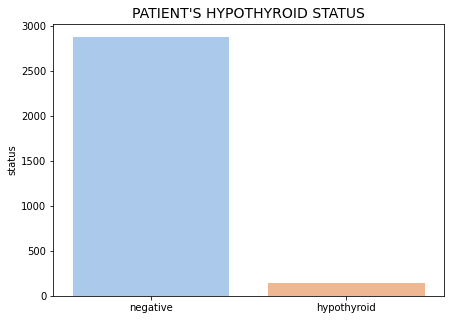

In [ ]:
#Comparing the number of patients who've tested positive for Hypothyroid :
Status = Hypothyroid.status.value_counts()
Status
# Negative: 2,874       Positive: 139

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("PATIENT'S HYPOTHYROID STATUS", fontsize = fontsize)
sns.barplot(x=Status.index, y=Status, palette='pastel');


Majority of the patients tested negative for Hypothyroid. This is a case of data imbalance

Recommendation:
- Further analysis to be done to establish if there exists any relationship between the sex of the patient and the hypothyroid status.
- The case of data imbalance to be monitored during data modelling to avoid a case of good accuracy scores due to the high number of negatives.
- To avoid overfitting, correlations between any 2 variables to be investigated.

2. **Bivariate Analysis**

This analysis aims to determine whether a statistical association exists between any two given variables.

 - Correlation Test

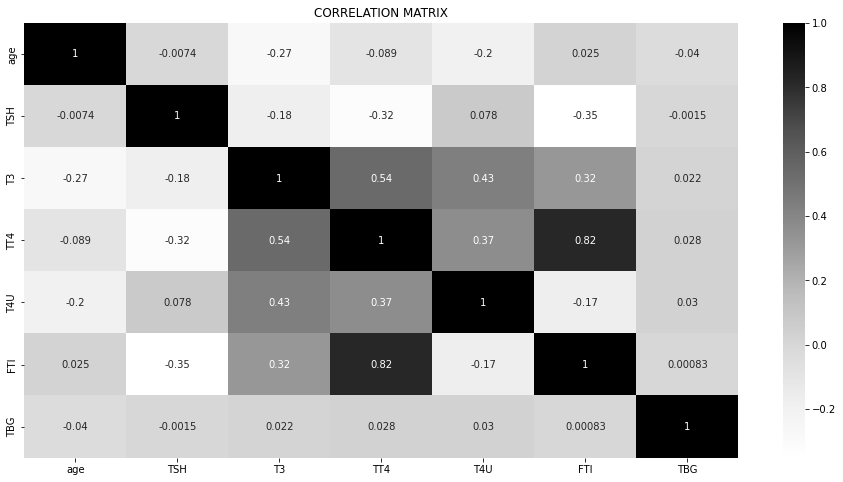

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (16, 8))
Corr = Hypothyroid.corr()
sns.heatmap(Corr, cmap = 'Greys', annot = True)
plt.title('CORRELATION MATRIX', y=1.5)
plt.show()


 - A strong positive relationship of 0.82 exists between FTI and TT4
 - A moderate relationship of 0.54 is observed between T3 and TT4
 
Multi-collinearity of features does not affect the accuracy and prediction performance of the ensembles. Features do not need to be removed or otherwise engineered to decrease the correlations and interactions between them.

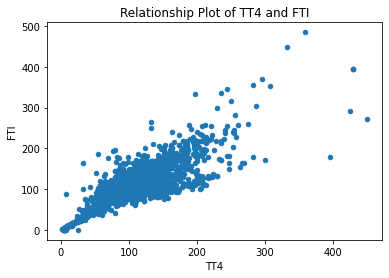

In [ ]:
#Plotting the relationship between TT4 and FT1:
Hypothyroid.plot(x = 'TT4', y = 'FTI', kind='scatter')
plt.title('Relationship Plot of TT4 and FTI')
plt.xlabel('TT4')
plt.ylabel('FTI')
plt.show()


The Plot indicates a positive correlation. As the value of TT4 changes so does the value of FTI.

 - Hypothyroid Status and Sex of the Patient

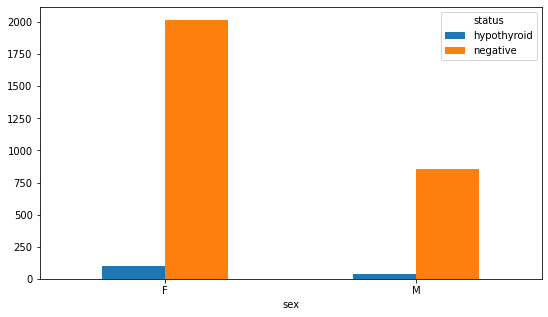

In [ ]:
#To understand the relationship between the sex of the patient and their status:
C=pd.crosstab(index=Hypothyroid['sex'],columns=Hypothyroid['status'])
C.plot.bar(figsize=(9,5), rot=0)


Due to data imbalance, its hard to conclude if indeed there exists any relationship between sex and Hypothyroid cases

 - Hypothyroid cases and thyroid surgery

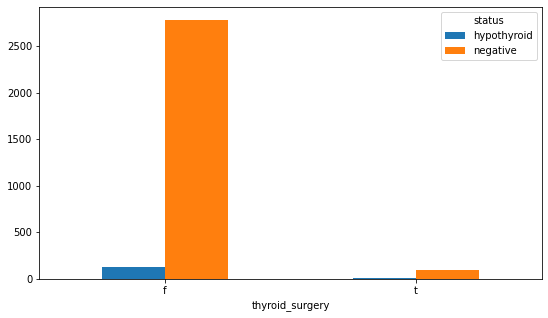

In [ ]:
#To understand the relationship between status and thyroid surgery cases:
C=pd.crosstab(index=Hypothyroid['thyroid_surgery'],columns=Hypothyroid['status'])
C.plot.bar(figsize=(9, 5), rot=0)


Since majority of the patients were negative cases, then most had not undergone any thyroid surgery

Recommendation:
- Due to imbalance, most of the analysis leans towards the Negative cases. Ways of dealing with data imbalance should be explored.

# **Modelling**

In as much as the tree-based ensemble algorithms can handle mixed data types and inputs do not need scaling, for the purpose of using the Support vector machine, the data will be encoded and normalised first

In [ ]:
#Creating the modelling dataframe:
Model = Hypothyroid.copy()
Model.head(4)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077


Label Encoding

In [ ]:
#Encoding the Categorical Variables to a machine readable format:
Categoricals = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
            'query_hypothyroid', 'query_hyperthyroid' ,'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured',
            'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
            
for i in Categoricals:
  Model[i] = LabelEncoder().fit_transform(Model[i])

#Viewing the Dataset:
Model.head(4)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,1.156913,1,0,0,0,0,0,0,0,0,0,0,0,1,1.077695,1,-1.558820,1,-2.197823,1,2.368505,1,-2.501555,0,0.006095
1,hypothyroid,-2.006931,0,1,0,0,0,0,0,0,0,0,0,0,1,6.206826,1,-0.267818,1,-2.103612,1,0.696480,1,-2.329895,0,0.006095
2,hypothyroid,-1.507377,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.260339,1,-2.028275,1,-2.456903,1,0.075442,1,-2.746784,0,0.006095
3,hypothyroid,-1.507377,0,0,0,0,0,0,0,0,0,0,0,0,1,18.918151,1,-1.793547,1,-2.409798,1,0.266531,1,-2.599647,0,0.006095


Normalization

In [ ]:
#Performing feature scaling on the numerical variables:
sc = StandardScaler()
Feature_Sc = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
Model[Feature_Sc] = sc. fit_transform(Model[Feature_Sc])
Model.head(4)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,1.156913,1,0,0,0,0,0,0,0,0,0,0,0,1,1.077695,1,-1.558820,1,-2.197823,1,2.368505,1,-2.501555,0,0.006095
1,hypothyroid,-2.006931,0,1,0,0,0,0,0,0,0,0,0,0,1,6.206826,1,-0.267818,1,-2.103612,1,0.696480,1,-2.329895,0,0.006095
2,hypothyroid,-1.507377,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.260339,1,-2.028275,1,-2.456903,1,0.075442,1,-2.746784,0,0.006095
3,hypothyroid,-1.507377,0,0,0,0,0,0,0,0,0,0,0,0,1,18.918151,1,-1.793547,1,-2.409798,1,0.266531,1,-2.599647,0,0.006095


**Part 1: Decision Trees**

Building a simple decision tree to use as the baseline model;

In [ ]:
#Creating the Variables:
X = Model.drop('status', axis=1)
y = Model['status']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (2410, 25)
y_train : (2410,)
X_test : (603, 25)
y_test : (603,)


Building a Basic Decision Tree Model

In [ ]:
#Model Selection without any hyperparameters:
Decision = DecisionTreeClassifier()

#Fitting the model:
Decision.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Decision.predict(X_test)


Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Decision.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Decision.score(X_test, y_test):.2f}')


Train Accuracy: 1.00
Test Accuracy: 0.99


The Training and Test set accuracy are very much comparable.

Since the model is doing better on both the training and test set, there's no case of Overfitting. 

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 hypothyroid       0.85      0.88      0.86        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.99       603
   macro avg       0.92      0.94      0.93       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[ 22,   3],
       [  4, 574]])

From the Classification report, the data is clearly seen as being highly imbalanced since 578 out of the 603 samples belong to Negative cases (95.85%). 

This means that the predictor is likely to always predict any given sample as belonging to Negative leading to the high Precision, Recall and f1 scores for Negatives and low for Hypothyroid cases.

The weighted averages scores are 99% since the classes are imbalanced and the metrics are weighted accordingly. For the macro average, since the values are not weighted and the model seems to always be predicting class negative, the score is lower.

From the confusion matrix, 3 and 4 are the misclassifications while 22 and 574 are the true predictions.

Hyperparameter Optimization

In [ ]:
#To view the parameters available for tuning in the Decision tree classifier:
DecisionTreeClassifier().get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Creating the parameter grid:
param_grid = {'max_depth': (10, 30, 50, 70, 90, 100),
              'criterion': ('gini', 'entropy'),
              'max_features': ('auto', 'sqrt', 'log2'),
              'min_samples_split': (2, 4, 6)}
              
print(param_grid)

{'max_depth': (10, 30, 50, 70, 90, 100), 'criterion': ('gini', 'entropy'), 'max_features': ('auto', 'sqrt', 'log2'), 'min_samples_split': (2, 4, 6)}


In [ ]:
#Using the decision tree classifier along with grid search:
Decision = DecisionTreeClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Decision, param_grid = param_grid, cv= 5,verbose = True )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_


{'criterion': 'entropy',
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_split': 4}

Building the Model with the best estimators

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Decision = DecisionTreeClassifier(criterion = 'entropy', max_depth = 70,
                               max_features = 'auto', min_samples_split = 4)

#Fitting the model:
Final_Decision.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Decision.predict(X_test)


In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Mn.score(X_train, y_train):.2f}')
Fore = print(f'Test Accuracy: {Mn.score(X_test, y_test):.2f}')

Model Evaluation

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 hypothyroid       0.72      0.72      0.72        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.85      0.85      0.85       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[ 18,   7],
       [  7, 571]])

After Optimization, the accuracy score went down to 98% , the macro average dropped from 93% to 85% and the true predictions for both cases also dropped. This could be that the algorithm's default parameters worked better.

Plotting the Tree

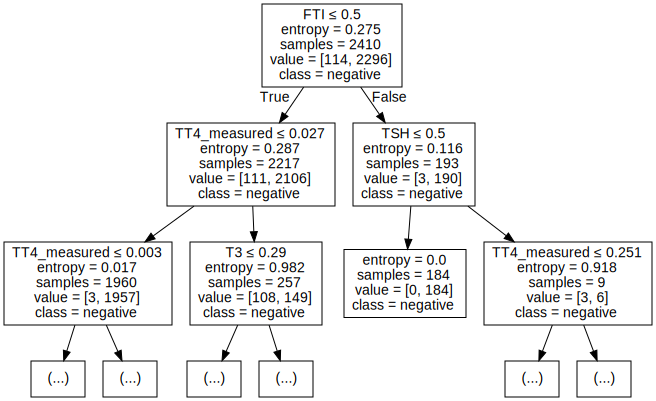

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

test_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
            'query_hypothyroid', 'query_hyperthyroid' ,'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured',
            'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]

#Creating dot data:   
dot_data = export_graphviz(Final_Decision, max_depth = 2,                                          #Limiting to a depth of 3 only
                           out_file = None, feature_names = test_features,                #Providing the independent variables
                           class_names = ['Hypothyroid', 'negative'],                     #Providing the dependent variables
                           filled = False, rounded = False, special_characters = True)    #Controlling the look of the nodes and coloring them                                           

#Displaying the graph                          
graph = graphviz.Source(dot_data)
graph


The dots indicate the decision tree goes further since the maximum depth has been set to 2. The root node is FTI. From the tree above, the significant variables can already be identified as FTI, TT4, TSH and T3

Feature Importance

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Final_Decision.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False)


,Features,Importance
14,TSH,0.606334
18,TT4,0.185701
22,FTI,0.067728
16,T3,0.052574
19,T4U_measured,0.022118
2,on_thyroxine,0.020772
20,T4U,0.019387
6,query_hypothyroid,0.008832
23,TBG_measured,0.006986
0,age,0.004619


TSH, FTI, TT4 and T3 are the most important features from the baseline model. Features with 0 are regarded as the least important

Using Advanced Models:

- **Random Forests**

This model builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model.drop('status', axis=1)
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (2410, 25)
y_train : (2410,)
X_test : (603, 25)
y_test : (603,)


Model Building

In [ ]:
#Initiating the random forest classifier:
Forest = RandomForestClassifier()

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)


Performance Evaluation

In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 hypothyroid       0.80      0.80      0.80        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.90      0.90      0.90       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[ 22,   3],
       [  3, 575]])

3 samples were misclassified for both Negative and Hypothyroid cases

Hyperparameter Optimization

In [ ]:
#To view the parameters available for tuning:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Choosing  optimal parameters:

#Number of trees in the random forest:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
#The function to measure the quality of the split:
criterion= ['gini', 'entropy']
#Number of features to consider at every split:
max_features = ['auto', 'sqrt']
#Maximum number of leaves in the tree:
max_depth = [2, 4]
#Minimum number of samples required to split a node:
min_samples_split = [2, 5]
#Minimum number of samples required at each leaf node:
min_samples_leaf = [1, 2]
#Method of selecting samples for training each tree:
bootstrap = [True, False]


In [ ]:
#Creating the pameter grid:
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
#Using the random forest classifier along with grid search:
Forest = RandomForestClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Forest, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

Above are the best parameters available in the combination provided. This are the ones to be used to build the final model

Building the Final Model 

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Random = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth =  4,
                               max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 33)

#Fitting the model:
Final_Random.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Random.predict(X_test)


In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_Random.score(X_train, y_train):.2f}')
Fore = print(f'Test Accuracy: {Final_Random.score(X_test, y_test):.2f}')


Train Accuracy: 0.99
Test Accuracy: 0.99


In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 hypothyroid       0.91      0.80      0.85        25
    negative       0.99      1.00      0.99       578

    accuracy                           0.99       603
   macro avg       0.95      0.90      0.92       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[ 20,   5],
       [  2, 576]])

In [ ]:
#Checking for the F1 score:
f1_score(y_test, y_pred)

0.8510638297872342

The scores of the Hypothyroid cases are performing better compared to the baseline model. The f1 score increased from 72% to 85%. The misclassifications also reduced from 7 in both cases to a 5 and 2

Variable Importance

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Final_Random.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False)


,Features,Importance
22,FTI,0.500848
14,TSH,0.219815
18,TT4,0.193625
16,T3,0.036724
20,T4U,0.014497
13,TSH_measured,0.011564
0,age,0.004826
6,query_hypothyroid,0.004299
2,on_thyroxine,0.003138
9,sick,0.002897


Comparing with the baseline model, FTI, TSH, TT4 and T3 are still the features with high importance. This means that their values have a significant impact on the outcome values.

Variables with low importance might be omitted from the model making it simpler and faster to fit and predict

 - **Adaptive/ADA Boosting**

This classifier combines multiple “weak classifiers” into a single “strong classifier”

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model.drop('status', axis=1)
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (2410, 25)
y_train : (2410,)
X_test : (603, 25)
y_test : (603,)


In [ ]:
#Initiating adaptive boosting:
Ada = AdaBoostClassifier()

#Fitting the model:
Ada.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Ada.predict(X_test)


Model Performance

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Ada.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Ada.score(X_test, y_test):.2f}')


Train Accuracy: 1.00
Test Accuracy: 0.99


In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

 hypothyroid       0.87      0.80      0.83        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.99       603
   macro avg       0.93      0.90      0.91       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[ 20,   5],
       [  3, 575]])

Hyperparameter Tuning

In [ ]:
#To view the parameters available for tuning:
AdaBoostClassifier().get_params()


{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
#Choosing optimal parameters:
#The maximum number of estimators at which boosting is terminated:
n_estimators = [30, 60, 80, 100, 150, 200]
#Weight applied to each classifier at each boosting iteration:
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25]
#The algorithm from which the ensemble is built on:
algorithm = ['SAMME', 'SAMME.R']


In [ ]:
#Creating the pameter grid:
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'algorithm': algorithm}
          
print(param_grid)


{'n_estimators': [30, 60, 80, 100, 150, 200], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25], 'algorithm': ['SAMME', 'SAMME.R']}


In [ ]:
#Using the ADA classifier along with grid search:
Ada = AdaBoostClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Ada, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_


{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 30}

Model Building

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Ada = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 30)

#Fitting the model:
Final_Ada.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Ada.predict(X_test)

Model Performance

In [ ]:
#Checking the accuracy:
print(f'Train Accuracy: {Final_Ada.score(X_train, y_train):.2f}')
Adap = print(f'Test Accuracy: {Final_Ada.score(X_test, y_test):.2f}')


Train Accuracy: 0.99
Test Accuracy: 0.99


In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.91      0.84      0.87        25
    negative       0.99      1.00      0.99       578

    accuracy                           0.99       603
   macro avg       0.95      0.92      0.93       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 21,   4],
       [  2, 576]])

In [ ]:
#Viewing the F1 score:
f1_score(y_test, y_pred)

0.8749999999999999

Compared to the baseline model, The scores of the postive cases are doing better with an F1 score of 87% compared to 72%

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Final_Ada.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False)


,Features,Importance
22,FTI,0.513745
14,TSH,0.486255
0,age,0.000000
13,TSH_measured,0.000000
23,TBG_measured,0.000000
21,FTI_measured,0.000000
20,T4U,0.000000
19,T4U_measured,0.000000
18,TT4,0.000000
17,TT4_measured,0.000000


From the ADA model, the only important features are FTI and TSH. All the rest do not add any value to this particular model

 - **Gradient Boosting**

Instead of using the weighted average of individual outputs as the final outputs, it uses a loss function to minimize loss and converge upon a final output value.

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model.drop('status', axis=1)
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (2410, 25)
y_train : (2410,)
X_test : (603, 25)
y_test : (603,)


In [ ]:
#Initiating gradient boosting:
Gradient = GradientBoostingClassifier()

#Fitting the model:
Gradient.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Gradient.predict(X_test)

Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Gradient.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Gradient.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.99


In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.91      0.84      0.87        25
    negative       0.99      1.00      0.99       578

    accuracy                           0.99       603
   macro avg       0.95      0.92      0.93       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 21,   4],
       [  2, 576]])

Hyperparameter Optimization

In [ ]:
#To view the parameters available for tuning:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Choosing optimal parameter:

#The number of boosting stages to perform:
n_estimators = [5, 10, 15]
#Choosing the best criterion:
criterion= ['friedman_mse', 'squared_error', 'mse', 'mae']
#Weight applied to each classifier at each boosting iteration:
learning_rate = [0.05, 0.10]
#Number of features to consider at every split:
max_features = ['auto', 'sqrt', 'log2']
#Maximum number of leaves in the tree:
max_depth = [2, 3, 4]
#Minimum number of samples required to split a node:
min_samples_split = [2, 5]
#Minimum number of samples required at each leaf node:
min_samples_leaf = [1, 2]


In [ ]:
#Creating the pameter grid:
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [5, 10, 15], 'learning_rate': [0.05, 0.1], 'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
#Using the gradient boosting classifier along with grid search:
Grad = GradientBoostingClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Grad, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Gradient = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 0.1,  max_depth =  3,
                               max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 15)

#Fitting the model:
Final_Gradient.fit(X_train,y_train )

#Predicting values:
y_pred = Final_Gradient.predict(X_test)

Model Performance

In [ ]:
#Checking the accuracy:
print(f'Train Accuracy: {Final_Gradient.score(X_train, y_train):.2f}')
Gra = print(f'Test Accuracy: {Final_Gradient.score(X_test, y_test):.2f}')

Train Accuracy: 0.99
Test Accuracy: 0.99


In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.91      0.84      0.87        25
    negative       0.99      1.00      0.99       578

    accuracy                           0.99       603
   macro avg       0.95      0.92      0.93       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Checking for the F1 score:
f1_score(y_test, y_pred)

0.8749999999999999

In [ ]:
#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X_train.columns, 'Importance':Final_Gradient.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False)

,Features,Importance
22,FTI,0.756604
14,TSH,0.208218
6,query_hypothyroid,0.011692
16,T3,0.006791
0,age,0.004335
5,thyroid_surgery,0.003638
20,T4U,0.002983
4,on_antithyroid_medication,0.002781
2,on_thyroxine,0.001787
18,TT4,0.001172


**Conclusions**

The 2 trusted models are: Random forest and Adaptive Boosting.

 - Gradient and Adaptive boosting have the same F1 scores. As much as gradient Boosting method theoretically performs better than AdaBoost, it is more prone to overfitting problems and runtime is longer. For this reason, The Adaptive model is preferred. 

 The adaptive model also leverages missed-classified cases from the previous model and creates a new weighted data sample in which miss-classified cases have more weightage. When it comes to the feature importance, AdaBoost  performs well by iterating on best features. In this case,  FTI and TSH are the most important features

 - Random forest on the other hand is able to reduce variation and fine-tune the prediction to a desired result.

From all the models, the features that are most impactful in influencing the predictions are: FTI and TSH

Part 2: **Support Vector Machine**

This modelling technique takes a representation of examples as points in space mapped so that the points of different categories are separated by a gap as wide as possible.

Different Kernel functions to be implemented are: Polynomial, linear and rbf.



 - 2 Features Selection

From the decision trees models, the most important features are FTI and TSH

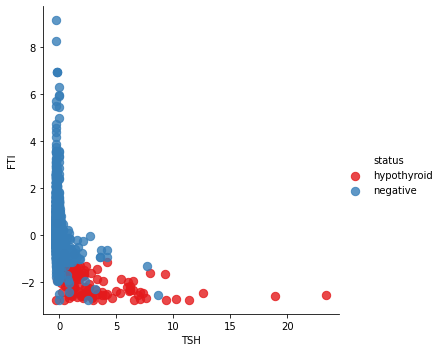

In [ ]:
#Plotting the most important features:
sns.lmplot('TSH', 'FTI', data=Model, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

From the plot above, SVM can be performed on the 2 features 

In [ ]:
#Creating a dataframe with the 2 features:
Part_2 = Model[['TSH', 'FTI', 'status']]
Part_2.head(4)

,TSH,FTI,status
0,1.077695,-2.501555,hypothyroid
1,6.206826,-2.329895,hypothyroid
2,-0.260339,-2.746784,hypothyroid
3,18.918151,-2.599647,hypothyroid


 - **Polynomial Function**

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model[['TSH', 'FTI']]
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2410, 2)
y_train : (2410,)
X_test : (603, 2)
y_test : (603,)


In [ ]:
#Initiating the Polynomial Kernel:
Poly = SVC(kernel = 'poly')

#Fitting the model:
Poly.fit(X_train, y_train )
 
#Applying the trained model to make a prediction:
y_pred = Poly.predict(X_test)

Model Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Poly.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Poly.score(X_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.98


The Training and Test set accuracy are very much comparable hence no case of overfitting.

In [ ]:
#Checking the precision and f1_score:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.85      0.68      0.76        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.92      0.84      0.87       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using the confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 17,   8],
       [  3, 575]])

17 hypothyroid and 575 negative cases are the number of correct predictions. 8 and 3 are the cases of incorrect predictions on the respective classes

Hyperparameter Optimization

In [ ]:
#To view the parameters available for tuning in Suport Vector Machine:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Creating the parmeter grid:
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['poly']}

print(param_grid)

{'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}


In [ ]:
#Using the Support Vector Classifier along with grid search:
Svc = SVC()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Svc, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2,scoring = 'accuracy')

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}

Fitting the Final Model

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_Poly = SVC(C = 100, gamma = 0.1, kernel = 'poly')

#Fitting the model:
Final_Poly.fit(X_train,y_train )

#Predicting values:
y_predFinal = Final_Poly.predict(X_test)

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_predFinal))

              precision    recall  f1-score   support

 hypothyroid       0.85      0.68      0.76        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.92      0.84      0.87       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using the confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 17,   8],
       [  3, 575]])

In [ ]:
#Checking the F1 score:
f1_score(y_test, y_pred)

0.8749999999999999

No major improvements are observed from the scores after optimization

Visualizing the Model

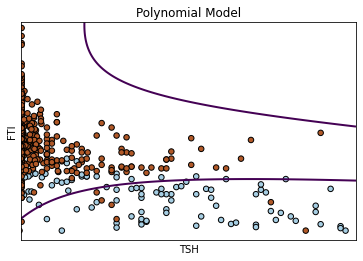

In [ ]:
#Visualizing the model with the optimized parameters:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = Part_2[['TSH', 'FTI']]
y = Part_2['status']

# fitting the model
clf = SVC(C = 100, gamma = 0.1, kernel = 'poly')
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="solid")
plt.scatter(X['TSH'], X['FTI'],c =y, s=30, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel('TSH')
plt.ylabel('FTI')
plt.xticks(())
plt.yticks(())
plt.axis([0, 3, -3, 3])
plt.title('Polynomial Model')
plt.show()

From the plot above, most of the features have not been correctly classified and the plane cuts in between some data points. This makes the kernel not the best selection

 - **Linear Function**

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model[['TSH', 'FTI']]
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2410, 2)
y_train : (2410,)
X_test : (603, 2)
y_test : (603,)


In [ ]:
#Initiating Support Vector Classifier:
linear = SVC(kernel = 'linear')

#Fitting the model:
linear.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = linear.predict(X_test)

Model Evaluation

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.74      0.80      0.77        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.87      0.89      0.88       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 20,   5],
       [  7, 571]])

20 hypothyroid and 571 negative cases are the number of correct predictions. 5 and 7 are the cases of incorrect predictions on the respective classes.

Comparing this matrix to the Polynomial, the number of correct hypothyroid cases increased from 17 to 20 while the negatives decreased from 575 to 571

Hyperparameter Tuning

In [ ]:
#Creating the parameter grid:
param_grid = {'C': [1, 10, 100, 1000],
              'kernel': ['linear']}

print(param_grid)

{'C': [1, 10, 100, 1000], 'kernel': ['linear']}


In [ ]:
#Using the classifier along with grid search:
Svc = SVC()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Svc, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'C': 10, 'kernel': 'linear'}

Fitting the Final Model

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_linear = SVC(C = 10, kernel = 'linear')

#Fitting the model:
Final_linear.fit(X_train,y_train )

#Predicting values:
y_predFinal = Final_linear.predict(X_test)

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_predFinal))

              precision    recall  f1-score   support

 hypothyroid       0.74      0.80      0.77        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.87      0.89      0.88       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_predFinal)

array([[ 20,   5],
       [  7, 571]])

In [ ]:
#Viewing the f1 score:
f1_score(y_test, y_pred)

0.8749999999999999

Visualizing the Model

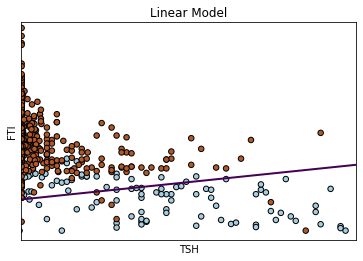

In [ ]:
#Visualizing the model with the optimized parameters:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = Part_2[['TSH', 'FTI']]
y = Part_2['status']

# fitting the model
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="solid")
plt.scatter(X['TSH'], X['FTI'],c =y, s=30, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel('TSH')
plt.ylabel('FTI')
plt.xticks(())
plt.yticks(())
plt.axis([0, 3, -3, 3])
plt.title('Linear Model')
plt.show()

From the Linear plot, seeing how the samples from different classes position in relation to each other, they cannot be easily separated using a single Line.

 - **Rbf Function**

In [ ]:
#Creating the Dependent and Independent Variables:
X = Model[['TSH', 'FTI']]
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2410, 2)
y_train : (2410,)
X_test : (603, 2)
y_test : (603,)


In [ ]:
#Initiating SVC:
rbf = SVC(kernel = 'rbf')

#Fitting the model:
rbf.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = rbf.predict(X_test)

Model Evaluation

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.87      0.80      0.83        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.99       603
   macro avg       0.93      0.90      0.91       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 20,   5],
       [  3, 575]])

20 hypothyroid and 575 negative cases are the number of correct predictions. 5 and 3 are the cases of incorrect predictions on the respective classes.

Comparing to Polynomial and Linear, the accuracy increased to 99% and the number of correct negative predictions increased to 575

In terms of the Macro average, the F1 score for Polynomial was 87%, Linear 88% and Rbf 91% recording the highest score.

The higher the F1 score the better.

Hyperparameter Tuning

In [ ]:
#Creating the pameter grid:
param_grid = {'C': [ 1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']}

print(param_grid)

{'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}


In [ ]:
#Initiating SVC:
Svc = SVC()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Svc, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
#To view the best parameters:
best_clf.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Fitting the Final Model

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final_rbf = SVC(C = 100, gamma = 0.01, kernel = 'rbf')

#Fitting the model:
Final_rbf.fit(X_train,y_train )

#Predicting values:
y_predFinal = Final_rbf.predict(X_test)

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_predFinal))

              precision    recall  f1-score   support

 hypothyroid       0.86      0.72      0.78        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.98       603
   macro avg       0.92      0.86      0.89       603
weighted avg       0.98      0.98      0.98       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_predFinal)

array([[ 18,   7],
       [  3, 575]])

In [ ]:
f1_score(y_test, y_pred)

0.8749999999999999

Visualizing the Model

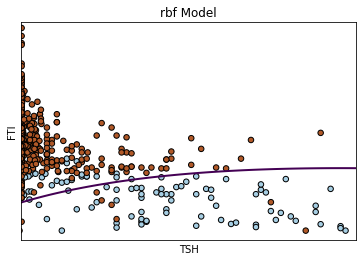

In [ ]:
#Visualizing the model with the optimized parameters:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = Part_2[['TSH', 'FTI']]
y = Part_2['status']

# fitting the model
clf = SVC(C = 100, gamma = 0.01, kernel = 'rbf')

clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="solid")
plt.scatter(X['TSH'], X['FTI'],c =y, s=30, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel('TSH')
plt.ylabel('FTI')
plt.xticks(())
plt.yticks(())
plt.axis([0, 3, -3, 3])
plt.title('rbf Model')
plt.show()

From the plot, the rbf model tends to try separate the 2 classes in a flexible manner and given that the points are non-linear, its the best model

Testing the Best Kernel

In [ ]:
#Alternatively, using the same parameters to compare the 3 kernels:
param_grid = {'C': [ 1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

Svc = SVC()
#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(Svc, param_grid = param_grid, cv= 5, n_jobs = 4, verbose = 2)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

#To view the best parameters:
best_clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


From the 3 kernels, rbf is the best performing kernel.


Using Additional Features

In [ ]:
#Building the Model with all the features:
#Creating the Dependent and Independent Variables:
X = Model.drop('status', axis=1)
y = np.where(Model.status == 'hypothyroid', 1, 0)

#Dividing the Data into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2410, 25)
y_train : (2410,)
X_test : (603, 25)
y_test : (603,)


In [ ]:
#Using the best kernel together with the tuned parameters:
model = SVC(C = 100, gamma = 0.01, kernel = 'rbf')

#Fitting the model:
model.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = model.predict(X_test)

In [ ]:
f1_score(y_test, y_pred)

0.8571428571428572

Model Evaluation

In [ ]:
#Checking the accuracy, precision and f1_score of the final model:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 hypothyroid       0.88      0.84      0.86        25
    negative       0.99      0.99      0.99       578

    accuracy                           0.99       603
   macro avg       0.93      0.92      0.93       603
weighted avg       0.99      0.99      0.99       603



In [ ]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)

array([[ 21,   4],
       [  3, 575]])

From the performance with additional features, the accuracy score improved to 99%, not a big difference from the 2 features.

If the accuracy can still be reached with few features, then its better training the model with the most relevant features so as to make it faster and simpler to predict

Performance Analysis

- From the Dataset, due to class imbalance, the precision, recall and F1 scores are the best metric to evaluate. 
- From the SVM the rbf kernel perfomed better as compared to the other models.
- From the decision tree models, the Ada boost and random forest are preferred due to nature of the classifiers


Conclusions

- In terms of the specific data analytics question, the data provided was appropriate. 
- When it comes to data imbalance,  modelling algorithms that are better at handling imbalanced data such as Random Forests are preferred. The Support Vector Machine algorithm on the other hand is effective for balanced classification.